In [1]:
!pip install bokeh hvplot
!pip install Cartopy
!pip install geoviews
!pip install pyproj
import hvplot.pandas
import holoviews as hv
hv.extension('bokeh')
from scipy.stats import linregress


In [2]:
# Dependencies and Setup
import hvplot.pandas
import pandas as pd
import requests
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import time


# Import API key
from api_key import geoapify_key



In [3]:
# Study data files
disaster_path= r"Data/group8_disaster.csv"


# Read the  data 
disaster_metadata = pd.read_csv(disaster_path)



disaster_metadata.head()


,Dis No,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,...,No Homeless,Total Affected,Reconstruction Costs ('000 US$),Insured Damages ('000 US$),Total Damages ('000 US$),CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
0,1970-0013-ARG,1970,13,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,25000.0,15.001282,NaN,NaN,NaN,NaN
1,1970-0109-AUS,1970,109,NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,Ada,...,NaN,NaN,NaN,NaN,72475.0,15.001282,NaN,NaN,NaN,NaN
2,1970-0044-BEN,1970,44,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,200.0,15.001282,NaN,NaN,NaN,NaN
3,1970-0063-BGD,1970,63,NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,NaN,...,NaN,3648000.0,NaN,NaN,86400.0,15.001282,NaN,NaN,NaN,NaN
4,1970-0026-BGD,1970,26,NaN,Natural,Meteorological,Storm,NaN,NaN,NaN,...,NaN,110.0,NaN,NaN,NaN,15.001282,NaN,NaN,NaN,NaN


In [4]:

disaster_metadata.columns

Index(['Dis No', 'Year', 'Seq', 'Glide', 'Disaster Group', 'Disaster Subgroup',
       'Disaster Type', 'Disaster Subtype', 'Disaster Subsubtype',
       'Event Name', 'Country', 'ISO', 'Region', 'Continent', 'Location',
       'Origin', 'Associated Dis', 'Associated Dis2', 'OFDA Response',
       'Appeal', 'Declaration', 'Aid Contribution', 'Dis Mag Value',
       'Dis Mag Scale', 'Latitude', 'Longitude', 'Local Time', 'River Basin',
       'Start Year', 'Start Month', 'Start Day', 'End Year', 'End Month',
       'End Day', 'Total Deaths', 'No Injured', 'No Affected', 'No Homeless',
       'Total Affected', 'Reconstruction Costs ('000 US$)',
       'Insured Damages ('000 US$)', 'Total Damages ('000 US$)', 'CPI',
       'Adm Level', 'Admin1 Code', 'Admin2 Code', 'Geo Locations'],
      dtype='object')

In [5]:
#Drop columns we don't need
clean_disaster_metadata = disaster_metadata.drop(columns=['Glide', 'Seq', 'Disaster Subtype', 'Disaster Subsubtype', 'Event Name', 'Origin', 'Associated Dis', 'Associated Dis2', 'OFDA Response', 'Appeal', 'Declaration', 'Aid Contribution', 'Dis Mag Value', 'Dis Mag Scale', 'ISO', 'Start Day','End Day', 'Local Time', 'River Basin', 'No Injured', 'No Affected', 'CPI', 'Adm Level', 'Admin1 Code', 'Admin2 Code', 'Geo Locations', """Reconstruction Costs ('000 US$)""",
       '''Insured Damages ('000 US$)''', 'Latitude', 'Longitude', 'Location', 'No Homeless'])
clean_disaster_metadata.head()


,Dis No,Year,Disaster Group,Disaster Subgroup,Disaster Type,Country,Region,Continent,Start Year,Start Month,End Year,End Month,Total Deaths,Total Affected,Total Damages ('000 US$)
0,1970-0013-ARG,1970,Natural,Hydrological,Flood,Argentina,South America,Americas,1970,1.0,1970,1.0,36.0,NaN,25000.0
1,1970-0109-AUS,1970,Natural,Meteorological,Storm,Australia,Australia and New Zealand,Oceania,1970,1.0,1970,1.0,13.0,NaN,72475.0
2,1970-0044-BEN,1970,Natural,Hydrological,Flood,Benin,Western Africa,Africa,1970,9.0,1970,9.0,NaN,NaN,200.0
3,1970-0063-BGD,1970,Natural,Meteorological,Storm,Bangladesh,Southern Asia,Asia,1970,11.0,1970,11.0,300000.0,3648000.0,86400.0
4,1970-0026-BGD,1970,Natural,Meteorological,Storm,Bangladesh,Southern Asia,Asia,1970,4.0,1970,4.0,17.0,110.0,NaN


In [7]:
#Read the column heads of new cleaned dataset
clean_disaster_metadata.columns

Index(['Dis No', 'Year', 'Disaster Group', 'Disaster Subgroup',
       'Disaster Type', 'Country', 'Region', 'Continent', 'Start Year',
       'Start Month', 'End Year', 'End Month', 'Total Deaths',
       'Total Affected', 'Total Damages ('000 US$)'],
      dtype='object')

In [8]:
#drop unique values
len(clean_disaster_metadata['Dis No'].unique())

14644

In [9]:
# drop any duplicate values
clean_disaster_metadata= clean_disaster_metadata.drop_duplicates()
clean_disaster_metadata.head()

,Dis No,Year,Disaster Group,Disaster Subgroup,Disaster Type,Country,Region,Continent,Start Year,Start Month,End Year,End Month,Total Deaths,Total Affected,Total Damages ('000 US$)
0,1970-0013-ARG,1970,Natural,Hydrological,Flood,Argentina,South America,Americas,1970,1.0,1970,1.0,36.0,NaN,25000.0
1,1970-0109-AUS,1970,Natural,Meteorological,Storm,Australia,Australia and New Zealand,Oceania,1970,1.0,1970,1.0,13.0,NaN,72475.0
2,1970-0044-BEN,1970,Natural,Hydrological,Flood,Benin,Western Africa,Africa,1970,9.0,1970,9.0,NaN,NaN,200.0
3,1970-0063-BGD,1970,Natural,Meteorological,Storm,Bangladesh,Southern Asia,Asia,1970,11.0,1970,11.0,300000.0,3648000.0,86400.0
4,1970-0026-BGD,1970,Natural,Meteorological,Storm,Bangladesh,Southern Asia,Asia,1970,4.0,1970,4.0,17.0,110.0,NaN


In [19]:
# # Function to get latitude and longitude of a country
def get_country_lat_long(country, api_key):
    url = f"https://api.geoapify.com/v1/geocode/search?text={country}&apiKey={api_key}"
    try:
        response = requests.get(url)
        response.raise_for_status()  # Raise HTTPError for bad responses
        data = response.json()
        if data['features']:
            latitude = data['features'][0]['geometry']['coordinates'][1]
            longitude = data['features'][0]['geometry']['coordinates'][0]
            return latitude, longitude
        else:
            print(f"No results found for {country}. Response: {data}")
            return None, None
    except requests.RequestException as e:
        print(f"Error fetching data for {country}. Error: {e}")
        return None, None

# Ensure columns for latitude and longitude are initialized
if 'Lat' not in clean_disaster_metadata.columns:
    clean_disaster_metadata["Lat"] = None
if 'Lng' not in clean_disaster_metadata.columns:
    clean_disaster_metadata["Lng"] = None

# Get latitudes and longitudes for each country and update the disaster_countries_df DataFrame
for index, row in clean_disaster_metadata.iterrows():
    country = row['Country']
    lat, long = get_country_lat_long(country, geoapify_key)
    if lat is not None and long is not None:
        print(f"{country}: Latitude = {lat}, Longitude = {long}")
        clean_disaster_metadata.at[index, 'Lat'] = lat
        clean_disaster_metadata.at[index, 'Lng'] = long
    else:
        print(f"Could not get coordinates for {country}")
        
# Verify that no extra rows labeled 'Lat' and 'Lng' are present
if 'Lat' in clean_disaster_metadata.index:
    clean_disaster_metadata.drop('Lat', inplace=True)
if 'Lng' in clean_disaster_metadata.index:
    clean_disaster_metadata.drop('Lng', inplace=True)

#clean_disaster_metadata.to_csv("output_data/country_coordinates.csv", index_label="country_coordinates")

    

Argentina: Latitude = -34.9964963, Longitude = -64.9672817
Australia: Latitude = -24.7761086, Longitude = 134.755
Bangladesh: Latitude = 24.4769288, Longitude = 90.2934413
Bangladesh: Latitude = 24.4769288, Longitude = 90.2934413
Bangladesh: Latitude = 24.4769288, Longitude = 90.2934413
Brazil: Latitude = -10.3333333, Longitude = -53.2
Barbados: Latitude = 13.1500331, Longitude = -59.5250305
Canada: Latitude = 61.0666922, Longitude = -107.991707
Switzerland: Latitude = 46.7985624, Longitude = 8.2319736
China: Latitude = 35.000074, Longitude = 104.999927
China: Latitude = 35.000074, Longitude = 104.999927
Côte d’Ivoire: Latitude = 7.9897371, Longitude = -5.5679458
Colombia: Latitude = 4.099917, Longitude = -72.9088133
Colombia: Latitude = 4.099917, Longitude = -72.9088133
Costa Rica: Latitude = 10.2735633, Longitude = -84.0739102
Costa Rica: Latitude = 10.2735633, Longitude = -84.0739102
Cuba: Latitude = 23.0131338, Longitude = -80.8328748
Ecuador: Latitude = -1.3397668, Longitude = -79

KeyboardInterrupt: 

In [11]:
%%capture --no-display
# Geographical questions:
#Which regions and countries have been most affected by
#natural disasters?(Use API to plot it)(use lng/lat)
#show number of death based on size of circles in map


# Ensure the correct data types
clean_disaster_metadata['Lat'] = pd.to_numeric(clean_disaster_metadata['Lat'], errors='coerce')
clean_disaster_metadata['Lng'] = pd.to_numeric(clean_disaster_metadata['Lng'], errors='coerce')
clean_disaster_metadata['Total Deaths'] = pd.to_numeric(clean_disaster_metadata['Total Deaths'], errors='coerce')
clean_disaster_metadata['Country'] = clean_disaster_metadata['Country'].astype(str)
clean_disaster_metadata['Disaster Type'] = clean_disaster_metadata['Disaster Type'].astype(str)

# Drop rows with NaN values in Lat, Lng, or Total Deaths
clean_disaster_metadata.dropna(subset=['Lat', 'Lng', 'Total Deaths'], inplace=True)

# Ensure there are no mixed types in any columns
print(clean_disaster_metadata.dtypes)

# Configure the map plot
map_plot = clean_disaster_metadata.hvplot.points(
    'Lng', 'Lat', 
    geo=True,
    tiles='OSM',
    frame_width=700,
    frame_height=500,
    size='Total Deaths',
    scale=0.1,
    color='Country',
    hover_cols=['Disaster Type']
)

# Display the map
map_plot

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Lng,Lat]   (Country,Total Deaths,Disaster Type)

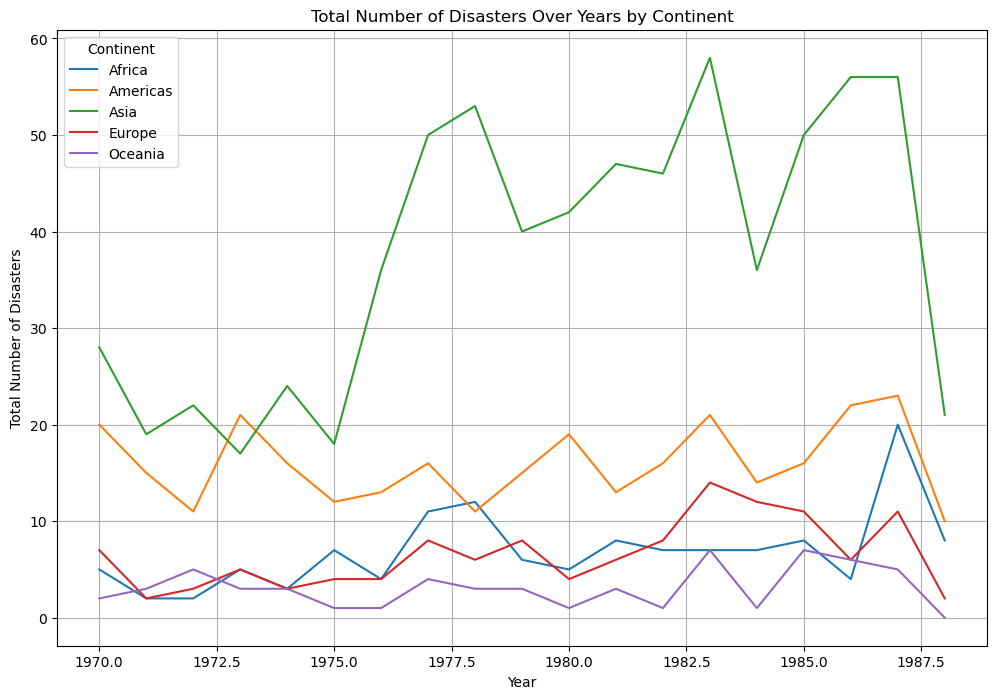

In [12]:
#plot line chart for total number of disasters over years against continents

# Group by Year and Continent to get the total number of disasters
disasters_per_year_continent = clean_disaster_metadata.groupby(['Year', 'Continent']).size().unstack(fill_value=0)

# Plotting the data
plt.figure(figsize=(12, 8))

for continent in disasters_per_year_continent.columns:
    plt.plot(disasters_per_year_continent.index, disasters_per_year_continent[continent], label=continent)

plt.xlabel('Year')
plt.ylabel('Total Number of Disasters')
plt.title('Total Number of Disasters Over Years by Continent')
plt.legend(title='Continent')
plt.grid(True)

# Save the figure
#plt.savefig("output_data/Fig3.png")
plt.show()

In [13]:

# Summary Statistics

summary_stats = clean_disaster_metadata.groupby('Continent')[['Total Deaths', 'Total Affected', "Total Damages ('000 US$)"]].agg(['mean', 'median'])

# Reset index to have 'Continent' as a column for easier reshaping
summary_stats = summary_stats.reset_index()

# Reshape the DataFrame so that continents are in rows and both mean and median statistics are in columns
summary_stats_df = summary_stats.set_index('Continent')

# Display the DataFrame
summary_stats_df




Total Deaths        Total Affected           \
                  mean median           mean   median   
Continent                                               
Africa     4122.236641   41.0   2.783232e+05   8257.0   
Americas    560.351974   29.0   3.268601e+05  15000.0   
Asia       1158.346314   57.0   1.627234e+06  14253.0   
Europe       97.338710   13.0   7.843827e+04   1000.0   
Oceania      17.610169    6.0   2.598094e+04   4000.0   

          Total Damages ('000 US$)            
                              mean    median  
Continent                                     
Africa               206527.444444   24000.0  
Americas             227656.038760   44650.0  
Asia                 170379.506329   20000.0  
Europe               866477.777778  250000.0  
Oceania               89889.418605   20000.0

In [14]:
# Frequency Distribution
frequency_distribution = clean_disaster_metadata['Continent'].value_counts()
frequency_distribution

Continent
Asia        719
Americas    304
Africa      131
Europe      124
Oceania      59
Name: count, dtype: int64

In [15]:

# Group by Year and Continent to get the total number of disasters
disasters_per_year_continent = clean_disaster_metadata.groupby(['Year', 'Continent']).size().unstack(fill_value=0)
disasters_per_year_continent

Continent,Africa,Americas,Asia,Europe,Oceania
Year,,,,,
1970,5,20,28,7,2
1971,2,15,19,2,3
1972,2,11,22,3,5
1973,5,21,17,5,3
1974,3,16,24,3,3
1975,7,12,18,4,1
1976,4,13,36,4,1
1977,11,16,50,8,4
1978,12,11,53,6,3


In [16]:

# Trend Analysis
trend_analysis = disasters_per_year_continent.describe()
trend_analysis

Continent,Africa,Americas,Asia,Europe,Oceania
count,19.000000,19.000000,19.000000,19.000000,19.000000
mean,6.894737,16.000000,37.842105,6.526316,3.105263
std,4.148557,3.986087,14.484717,3.501879,2.105409
min,2.000000,10.000000,17.000000,2.000000,0.000000
25%,4.500000,13.000000,23.000000,4.000000,1.000000
50%,7.000000,16.000000,40.000000,6.000000,3.000000
75%,8.000000,19.500000,50.000000,8.000000,4.500000
max,20.000000,23.000000,58.000000,14.000000,7.000000


## Total Damages vs Total Deaths Linear Regression plot 

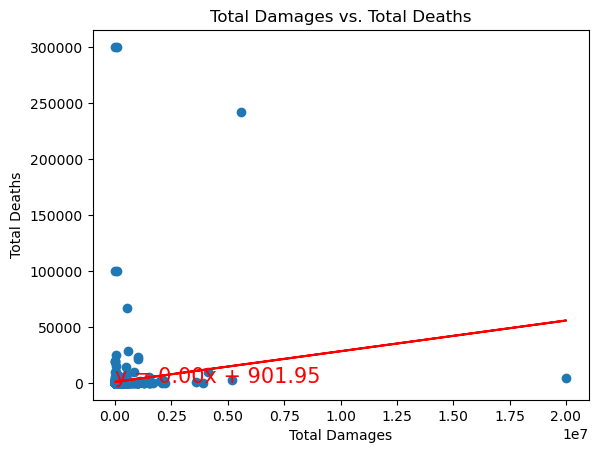

R-squared value: 0.015904626214754435


In [17]:

def linear_regression_plot(x_values, y_values, x_label, y_label, title):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    
    # Get regression line values
    regress_values = x_values * slope + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    
    # Create scatter plot
    plt.scatter(x_values, y_values)
    
    # Plot regression line
    plt.plot(x_values, regress_values, "r-")
    
    # Annotate the regression line equation
    plt.annotate(line_eq, (x_values.min(), y_values.min()), fontsize=15, color="red")
    
    # Add labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    
    # Show the plot
    plt.show()
    
    return r_value

df = clean_disaster_metadata.dropna(subset=['Total Deaths'])  # Drop rows where 'Total Deaths' is NaN
df.fillna(0, inplace=True)  # Fill other NaN values with 0

# Example usage of the function
x_values = df["Total Damages ('000 US$)"]
y_values = df['Total Deaths']

r_value = linear_regression_plot(x_values, y_values, 'Total Damages', 'Total Deaths', 'Total Damages vs. Total Deaths')
print(f"R-squared value: {r_value**2}")

The R-squared value of approximately 0.007 indicates that the linear regression model explains only about 0.7% of the variance in the Total Deaths based on the Total Damages. This is a very low value, suggesting that Total Damages is not a good predictor for Total Deaths in your dataset.

This low R-squared value implies that the relationship between Total Damages and Total Deaths is weak. There might be other factors influencing Total Deaths that are not captured by Total Damages. It might be useful to explore other features or combinations of features to find better predictors for Total Deaths.

In [18]:
# Aggregation by Country
country_aggregation = clean_disaster_metadata.groupby('Country').agg({
    'Total Deaths': 'sum',
    'Total Affected': 'sum',
    "Total Damages ('000 US$)": 'sum'
}).reset_index()
country_aggregation_df=pd.DataFrame(country_aggregation)
country_aggregation_df


,Country,Total Deaths,Total Affected,Total Damages ('000 US$)
0,Afghanistan,1054.0,764222.0,61000.0
1,Albania,161.0,12466.0,5000.0
2,Algeria,2856.0,1124503.0,5242000.0
3,Angola,59.0,673.0,0.0
4,Argentina,535.0,6249752.0,2135000.0
...,...,...,...,...
130,Viet Nam,449.0,404000.0,0.0
131,Yemen Arab Rep,112.0,52862.0,12700.0
132,Yugoslavia,35.0,174.0,0.0
133,Zambia,11.0,30900.0,200.0
